# Caso 2: Modelos de Classificação Supervisionados

Versão Python:

In [1]:
from platform import python_version
print("Versão de Python: ", python_version())

Versão de Python:  3.9.13


Livrarias:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Definição do Desafio

- Considera-se o conjunto de dados de $683$ pacientes de um centro médico. Cada paciente é categorizado de acordo com sua condição médica ($2$ para "tem câncer" e $4$ para "não tem câncer").

- Busca-se desenvolver um sistema capaz de prever a condição oncológica de futuros pacientes com base em nove ($9$) características específicas.

## Quadro geral do desafio

- Como se espera usar e se beneficiar desse modelo? A saida do modelo será a classificação de pacientes segundo sua condição de saúde. Este sistema determinará quais paciêntes devem ser encaminhados para tratamento. Não alimenta outro sistema. 

- Como é a solução atual? O especilista médica olha e determina quais pacientes e determinam a condição de saúde dos mesmos. O que implica bastantes regras e um alto valor. 

## Sistema, tarefa e ténica de ML

- Qual tipo de supervisão de treinamento será necessário para o modelo? Será necessário um sistema de *ML* supervisionado, uma vez que que os individus são rotulados por sua condição médica. 

- Qual será a tarefa desempenhada pelo modelo? Clasificação do estado de saúde dos paciente. 

- Deve-se utilizar técnicas de aprendizado em lote ou em tempo real? Por lote, uma vez que o banco de dados não é atualizado rápidamente. 

## Obter Dados

In [3]:
# Carregar dados
data_set = pd.read_csv("Data.csv")

In [4]:
# renomear colu
data_set.columns = ['code_number', 'clump_thickness', 'uniformity_cell_size',
       'uniformity_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
       'normal_nucleoli', 'mitoses', 'class']

In [5]:
# Cabeçalho de dados
data_set.head(n = 10)

,code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


## Descritiva

In [6]:
# estrutura de dados 
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   code_number                  683 non-null    int64
 1   clump_thickness              683 non-null    int64
 2   uniformity_cell_size         683 non-null    int64
 3   uniformity_cell_shape        683 non-null    int64
 4   marginal_adhesion            683 non-null    int64
 5   single_epithelial_cell_size  683 non-null    int64
 6   bare_nuclei                  683 non-null    int64
 7   bland_chromatin              683 non-null    int64
 8   normal_nucleoli              683 non-null    int64
 9   mitoses                      683 non-null    int64
 10  class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [7]:
# total de valores ausentes
data_set.isna().sum(axis = 0)

code_number                    0
clump_thickness                0
uniformity_cell_size           0
uniformity_cell_shape          0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

Gráfico de barra: 

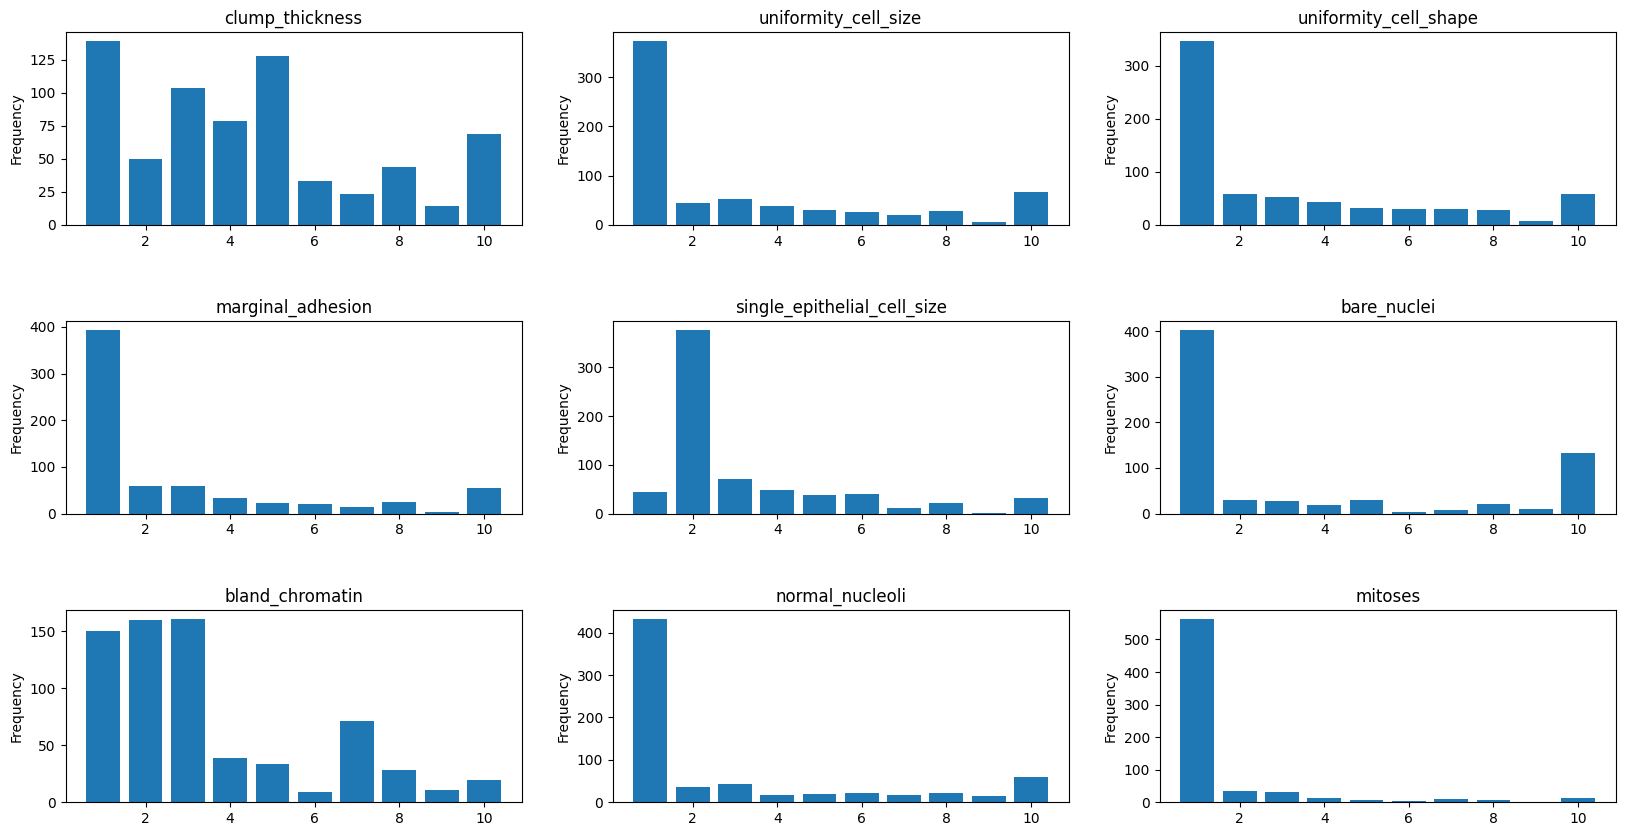

In [8]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing

col_names = data_set.columns
for c, ax in enumerate(axs.flat, start=1):
    data_count = data_set.iloc[:, c].value_counts().sort_index()
    data_index = data_count.index

    ax.bar(data_index, data_count)
    ax.set_title(col_names[c])
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')
plt.show()

In [9]:
# Prevaçência variável de resposta
counts = data_set.iloc[:,-1].value_counts()
print((counts / counts.sum()).round(2))

2    0.65
4    0.35
Name: class, dtype: float64


Considerações: 
- Não existem valores ausentes. 
- Todas os recursos são variáveis ordinais.
- A variável de resposta (target) é binária. 
- Existem níveis com poucos dados. 
- Existe prevalênça na deteção de câncer, maiormente as pessoas não tem câncer (65 %). 

## Conjunto Treinamento e Teste

Recursos e target:

In [10]:
X = data_set.copy().iloc[:, 1:-1]
y = data_set.copy().iloc[:, -1]
y = pd.DataFrame(np.where(y == 2, 0, 1), columns=["class"], dtype=np.int16)

Dividir conjuntos: 

In [11]:
from sklearn.model_selection import train_test_split 

In [12]:
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)
y_train, y_test = train_test_split(y, test_size = 0.2, random_state = 42)

## Pré-processamento

In [13]:
# Copia de conjunto de treinamento
X_train_copy = X_train.copy()
y_train_copy = y_train.copy()

In [14]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

In [15]:
#  Variável `Age` e `EstimatedSalary`: Imputar, transformação log, padronizar.
ordinal_pipeline = make_pipeline(KNNImputer(n_neighbors=5, weights="uniform"),
                                 OrdinalEncoder(handle_unknown="use_encoded_value",
                                               unknown_value=10, # valor mais próximo e frequente
                                               dtype=np.int64))

# pré-processamento
pre_processamento = ColumnTransformer([
    ("ordinal", ordinal_pipeline, ['clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape',
       'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses'])
])


In [16]:
# executar pré_processamento
X_train_proce = pd.DataFrame(data = pre_processamento.fit_transform(X_train_copy), 
                      columns = pre_processamento.get_feature_names_out(),
                      dtype = np.int64)

X_train_proce.head(n = 10)

,ordinal__clump_thickness,ordinal__uniformity_cell_size,ordinal__uniformity_cell_shape,ordinal__marginal_adhesion,ordinal__single_epithelial_cell_size,ordinal__bare_nuclei,ordinal__bland_chromatin,ordinal__normal_nucleoli,ordinal__mitoses
0,2,0,0,2,1,0,0,0,0
1,6,8,3,9,9,2,4,2,2
2,4,1,3,0,0,0,0,0,0
3,9,6,6,5,3,9,3,0,1
4,1,0,0,0,1,0,2,0,0
5,3,0,0,0,1,0,1,0,0
6,4,0,0,0,0,0,0,0,0
7,9,9,9,9,2,9,9,5,0
8,5,2,3,0,4,1,2,8,0
9,2,0,0,0,1,0,0,0,0


In [17]:
# codificar variável de resposta
le = LabelEncoder()
y_train_encod = le.fit_transform(y_train_copy.values.ravel())
y_train_encod[0:5]

array([0, 1, 0, 1, 0], dtype=int64)

## Selecionar um modelo

#### Modelo de Regressão Logística: 

In [18]:
from sklearn.linear_model import LogisticRegression
lin_logistic = make_pipeline(pre_processamento, LogisticRegression())
lin_logistic.fit(X_train_copy, y_train_encod)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(dtype=<class 'numpy.int64'>,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=10))]),
                                                  ['clump_thickness',
                                                   'uniformity_cell_size',
                                                   'uniformity_cell_shape',
                                                   'marginal_adhesion',
                                                   'single_epithelial_cell_size',
                                                   'bare_nuclei',
                                                   'bland_chromatin',
                                                   'normal_nucleoli',
                                                   'mitoses'])])),
                ('logisticregression', LogisticRegression())])

#### Modelo K-Nearest Neighbors (K-NN)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
class_neigh = make_pipeline(pre_processamento,
                            KNeighborsClassifier(n_neighbors = 5, p = 2, metric = "minkowski"))
class_neigh.fit(X_train_copy, y_train_encod)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(dtype=<class 'numpy.int64'>,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=10))]),
                                                  ['clump_thickness',
                                                   'uniformity_cell_size',
                                                   'uniformity_cell_shape',
                                                   'marginal_adhesion',
                                                   'single_epithelial_cell_size',
                                                   'bare_nuclei',
                                                   'bland_chromatin',
                                                   'normal_nucleoli',
                                                   'mitoses'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

#### Modelo SVM Linear

- Este modelo se suponhe que os dados são separáveis linearmente.

In [20]:
from sklearn.svm import SVC
class_svm = make_pipeline(pre_processamento, SVC(kernel = "linear", random_state = 42))
class_svm.fit(X_train_copy, y_train_encod)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(dtype=<class 'numpy.int64'>,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=10))]),
                                                  ['clump_thickness',
                                                   'uniformity_cell_size',
                                                   'uniformity_cell_shape',
                                                   'marginal_adhesion',
                                                   'single_epithelial_cell_size',
                                                   'bare_nuclei',
                                                   'bland_chromatin',
                                                   'normal_nucleoli',
                                                   'mitoses'])])),
                ('svc', SVC(kernel='linear', random_state=42))])

#### Modelo SVM Não Linear

In [21]:
from sklearn.svm import SVC
class_svm_rbf = make_pipeline(pre_processamento, SVC(kernel = "rbf", random_state = 42))
class_svm_rbf.fit(X_train_copy, y_train_encod)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(dtype=<class 'numpy.int64'>,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=10))]),
                                                  ['clump_thickness',
                                                   'uniformity_cell_size',
                                                   'uniformity_cell_shape',
                                                   'marginal_adhesion',
                                                   'single_epithelial_cell_size',
                                                   'bare_nuclei',
                                                   'bland_chromatin',
                                                   'normal_nucleoli',
                                                   'mitoses'])])),
                ('svc', SVC(random_state=42))])

In [22]:
from sklearn.svm import SVC
class_svm_poly = make_pipeline(pre_processamento, SVC(kernel = "poly", random_state = 42))
class_svm_poly.fit(X_train_copy, y_train_encod)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(dtype=<class 'numpy.int64'>,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=10))]),
                                                  ['clump_thickness',
                                                   'uniformity_cell_size',
                                                   'uniformity_cell_shape',
                                                   'marginal_adhesion',
                                                   'single_epithelial_cell_size',
                                                   'bare_nuclei',
                                                   'bland_chromatin',
                                                   'normal_nucleoli',
                                                   'mitoses'])])),
                ('svc', SVC(kernel='poly', random_state=42))])

In [23]:
from sklearn.svm import SVC
class_svm_sigmoid = make_pipeline(pre_processamento, SVC(kernel = "sigmoid", random_state = 42))
class_svm_sigmoid.fit(X_train_copy, y_train_encod)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(dtype=<class 'numpy.int64'>,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=10))]),
                                                  ['clump_thickness',
                                                   'uniformity_cell_size',
                                                   'uniformity_cell_shape',
                                                   'marginal_adhesion',
                                                   'single_epithelial_cell_size',
                                                   'bare_nuclei',
                                                   'bland_chromatin',
                                                   'normal_nucleoli',
                                                   'mitoses'])])),
                ('svc', SVC(kernel='sigmoid', random_state=42))])

#### Modelo Naives Bayes

- Apresenta o suposto que as caraterísticas $(X_1, X_2, \cdots, X_n)$ são independêntes. 
- Neste caso, o suposto é violado mesmo assim é aplicado por motivos de previsão e tenta-se encontrar alguma vantagem. 

In [24]:
from sklearn.naive_bayes import GaussianNB
class_bayes_gauss = make_pipeline(pre_processamento, GaussianNB())
class_bayes_gauss.fit(X_train_copy, y_train_encod)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(dtype=<class 'numpy.int64'>,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=10))]),
                                                  ['clump_thickness',
                                                   'uniformity_cell_size',
                                                   'uniformity_cell_shape',
                                                   'marginal_adhesion',
                                                   'single_epithelial_cell_size',
                                                   'bare_nuclei',
                                                   'bland_chromatin',
                                                   'normal_nucleoli',
                                                   'mitoses'])])),
                ('gaussiannb', GaussianNB())])

#### Modelo de Classificação de  Arvore de Desição 

- Este modelo é muito velho, não são muito poderosos e simples pelo que seu uso está morrendo.
- Tive um renacimento, sendo a base de outros modelos aproveitam sua simplicidade e são mais poderosos. 

In [25]:
from sklearn.tree import DecisionTreeClassifier
class_dtree = make_pipeline(pre_processamento, DecisionTreeClassifier(criterion="entropy", random_state=42))
class_dtree.fit(X_train_copy, y_train_encod)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(dtype=<class 'numpy.int64'>,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=10))]),
                                                  ['clump_thickness',
                                                   'uniformity_cell_size',
                                                   'uniformity_cell_shape',
                                                   'marginal_adhesion',
                                                   'single_epithelial_cell_size',
                                                   'bare_nuclei',
                                                   'bland_chromatin',
                                                   'normal_nucleoli',
                                                   'mitoses'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', random_state=42))])

#### Modelo de Classificação de Foresta Aleatória 

A Floresta Aleatória é um exemplo de aprendizado conjunto homogêneo (`Same Type Ensemble`), pois é composta por várias árvores de decisão. Cada árvore é treinada de forma independente, e suas previsões são combinadas (geralmente por voto majoritário no caso de classificação ou média no caso de regressão) para formar a previsão final do modelo. Essa abordagem ajuda a reduzir a variância do modelo e a melhorar o desempenho geral, tornando a Floresta Aleatória uma escolha popular em muitas tarefas de aprendizado de máquina..

In [ ]:
from sklearn.ensemble import RandomForestClassifier
class_forest = make_pipeline(pre_processamento, RandomForestClassifier(n_estimators = 100, criterion = "entropy", random_state = 42))
class_forest.fit(X_train_copy, y_train_encod)

Medidas de Precisão:

- Usando Validação Cruzada (CV): Requer um tempo computacional proporcional ao número de *k - fold* escolhidos para analises. Não existe uma regra para a seleção dos *k - fold* mas escolhas tipicas são $5$ ou $10$. Resulta conveniente quando o tamnho do conjunto de treinamento for menor do que $1.000$. 

- Usando Bootstrap: tende a haver menos variabilidade na medida do erro em comparação com o CV k-fold (Efron, 1983). No entanto, isso também pode aumentar o viés da sua estimativa de erro. Isto pode ser problemático com conjuntos de dados menores; no entanto, para a maioria dos conjuntos de dados médios a grandes (digamos 𝑛 ≥ 1.000) essa preocupação geralmente é insignificante. Sendo conveniente quando o conjunto de treinamento for maior ou igual a $1.000$.

- Aqui se tem um tamanho de conjunto de treinamento $< 1.000$, assim se realizam as medidas de precisão através de *cv* com $k = 5$, i.e, um $20 \%$ do conjunto para avaliação:

## Selecionar e Treinar um Modelo

In [ ]:
# Previsão usando valodação cruzada
from sklearn.model_selection import cross_val_predict
y_train_pred_logic = cross_val_predict(lin_logistic, X_train_copy, y_train_encod, cv = 5)
y_train_pred_neigh = cross_val_predict(class_neigh, X_train_copy, y_train_encod, cv = 5) 
y_train_pred_svm  = cross_val_predict(class_svm, X_train_copy, y_train_encod, cv = 5) 
y_train_pred_svm_rbf  = cross_val_predict(class_svm_rbf, X_train_copy, y_train_encod, cv = 5) 
y_train_pred_svm_poly  = cross_val_predict(class_svm_poly, X_train_copy, y_train_encod, cv = 5) 
y_train_pred_svm_sigmoid  = cross_val_predict(class_svm_sigmoid, X_train_copy, y_train_encod, cv = 5) 
y_train_pred_bayes_gauss = cross_val_predict(class_bayes_gauss, X_train_copy, y_train_encod, cv = 5) 
y_train_pred_dtree = cross_val_predict(class_dtree, X_train_copy, y_train_encod, cv = 5)
y_train_pred_forest = cross_val_predict(class_forest, X_train_copy, y_train_encod, cv = 5)

In [ ]:
from sklearn.metrics import mean_squared_error, confusion_matrix, roc_curve, precision_recall_curve, f1_score

In [ ]:
# Matriz de confusão usando CV
logic_cm = confusion_matrix(y_train_encod, y_train_pred_logic)
neigh_cm = confusion_matrix(y_train_encod, y_train_pred_neigh)
svm_cm = confusion_matrix(y_train_encod, y_train_pred_svm)
svm_rbf_cm = confusion_matrix(y_train_encod, y_train_pred_svm_rbf)
svm_poly_cm = confusion_matrix(y_train_encod, y_train_pred_svm_poly)
svm_sigmoid_cm = confusion_matrix(y_train_encod, y_train_pred_svm_sigmoid)
bayes_cm = confusion_matrix(y_train_encod, y_train_pred_bayes_gauss)
dtree_cm = confusion_matrix(y_train_encod, y_train_pred_dtree)
forest_cm = confusion_matrix(y_train_encod, y_train_pred_forest)

print("Matriz de confusão do Linear Logística:"); print(logic_cm)
print("Matriz de confusão do KNN:"); print(neigh_cm)
print("Matriz de confusão do SVM Kernel Linear:"); print(svm_cm)
print("Matriz de confusão do SVM Kernel rbf:"); print(svm_rbf_cm)
print("Matriz de confusão do SVM Kernel poly:"); print(svm_poly_cm)
print("Matriz de confusão do SVM Kernel sigmoid:"); print(svm_sigmoid_cm)
print("Matriz de confusão do Naive Bayes:"); print(bayes_cm)
print("Matriz de confusão do Classification Tree:"); print(dtree_cm)
print("Matriz de confusão do Classification Random Forest:"); print(forest_cm)

Curva ROC (Recall vs TFP) e Curva PR (Presição/Recall):

- Como regra geral, se deve preferir a curva PR sempre que a classe positiva for rara (pouca frequência) ou quando você se importar mais com os falsos positivos do que com os falsos negativos. Caso contrário, use a curva ROC.

- Para este caso se quer disminuir o número de falsos positivos, devido que a campanha de marketing vai ser em aqueles clientes que compraram os automóveis. Se calcula a curva ROC para aprendizado. 

In [ ]:
# Função score
y_scores_logic = cross_val_predict(lin_logistic, X_train_copy, y_train_encod, cv = 5, method = "decision_function")

model_neigh = class_neigh.named_steps["kneighborsclassifier"]
distance_neigh, distance_ind = model_neigh.kneighbors(X_train_copy.values)
y_scores_neigh = distance_neigh.mean(axis=1)

y_scores_svm = cross_val_predict(class_svm, X_train_copy, y_train_encod, cv = 5, method = "decision_function")
y_scores_svm_rbf = cross_val_predict(class_svm_rbf, X_train_copy, y_train_encod, cv = 5, method = "decision_function")
y_scores_svm_poly = cross_val_predict(class_svm_poly, X_train_copy, y_train_encod, cv = 5, method = "decision_function")
y_scores_svm_sigmoid = cross_val_predict(class_svm_sigmoid, X_train_copy, y_train_encod, cv = 5, method = "decision_function")

y_scores_bayes_gauss = cross_val_predict(class_bayes_gauss, X_train_copy, y_train_encod, cv = 5, method = "predict_proba")
y_scores_bayes_gauss = y_scores_bayes_gauss.max(axis = 1)

y_scores_dtree = cross_val_predict(class_dtree, X_train_copy, y_train_encod, cv = 5, method = "predict_proba")
y_scores_forest = cross_val_predict(class_forest, X_train_copy, y_train_encod, cv = 5, method = "predict_proba")

In [ ]:
# Curva PR usando CV
precisions_logic, recalls_logic, thresholds_logic = precision_recall_curve(y_train_encod, y_scores_logic)
precisions_neigh, recalls_neigh, thresholds_neigh = precision_recall_curve(y_train_encod, y_scores_neigh)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train_encod, y_scores_svm)
precisions_svm_rbf, recalls_svm_rbf, thresholds_svm_rbf = precision_recall_curve(y_train_encod, y_scores_svm_rbf)
precisions_svm_poly, recalls_svm_poly, thresholds_svm_poly = precision_recall_curve(y_train_encod, y_scores_svm_poly)
precisions_svm_sigmoid, recalls_svm_sigmoid, thresholds_svm_sigmoid = precision_recall_curve(y_train_encod, y_scores_svm_sigmoid)

precisions_bayes, recalls_bayes, thresholds_bayes = precision_recall_curve(y_train_encod, y_scores_bayes_gauss)
precisions_dtree, recalls_dtree, thresholds_dtree = precision_recall_curve(y_train_encod, y_scores_dtree.max(axis = 1))
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_encod, y_scores_forest.max(axis = 1))

In [ ]:
# difinindo o limear para uma presição maior ou igual ao 90% 
idx_for_90_precision_logic = (precisions_logic >= 0.90).argmax()
threshold_for_90_precision_logic = thresholds_logic[idx_for_90_precision_logic]
print("Limear de classificação do Logistic:", threshold_for_90_precision_logic.round(2))
print("-----------------------------")
print("Recall para a Precisão de 0.9 requerida do Logistic:", recalls_logic[idx_for_90_precision_logic].round(2))

In [ ]:
idx_for_90_precision_neigh = (precisions_neigh >= 0.90).argmax()
threshold_for_90_precision_neigh = thresholds_neigh[idx_for_90_precision_neigh]
print("Limear de classificação do Knn:", threshold_for_90_precision_neigh.round(2))
print("-----------------------------")
print("Recall para a Precisão de 0.9 requerida do Knn:", recalls_neigh[idx_for_90_precision_neigh].round(2))

In [ ]:
idx_for_90_precision_svm = (precisions_svm >= 0.90).argmax()
threshold_for_90_precision_svm = thresholds_svm[idx_for_90_precision_svm]
print("Limear de classificação do SVM Linear:", threshold_for_90_precision_svm.round(2))
print("-----------------------------")
print("Recall para a Precisão de 0.9 requerida do SVM Kernel Linear:", recalls_svm[idx_for_90_precision_svm].round(2))

In [ ]:
idx_for_90_precision_svm_rbf = (precisions_svm_rbf >= 0.90).argmax()
threshold_for_90_precision_svm_rbf = thresholds_svm[idx_for_90_precision_svm_rbf]
print("Limear de classificação do SVM rbf:", threshold_for_90_precision_svm_rbf.round(2))
print("-----------------------------")
print("Recall para a Precisão de 0.9 requerida do SVM Kernel rbf:", recalls_svm_rbf[idx_for_90_precision_svm_rbf].round(2))

In [ ]:
idx_for_90_precision_svm_poly = (precisions_svm_poly >= 0.90).argmax()
threshold_for_90_precision_svm_poly = thresholds_svm_poly[idx_for_90_precision_svm_poly]
print("Limear de classificação do SVM poly:", threshold_for_90_precision_svm_poly.round(2))
print("-----------------------------")
print("Recall para a Precisão de 0.9 requerida do SVM Kernel poly:", recalls_svm_poly[idx_for_90_precision_svm_poly].round(2))

In [ ]:
idx_for_90_precision_svm_sigmoid = (precisions_svm_sigmoid  >= 0.90).argmax()
threshold_for_90_precision_svm_sigmoid  = thresholds_svm_sigmoid [idx_for_90_precision_svm_sigmoid ]
print("Limear de classificação do SVM sigmoid:", threshold_for_90_precision_svm_sigmoid.round(2))
print("-----------------------------")
print("Recall para a Precisão de 0.9 requerida do SVM Kernel sigmoid :", recalls_svm_sigmoid [idx_for_90_precision_svm_sigmoid].round(2))

In [ ]:
idx_for_90_precision_bayes = (precisions_bayes >= 0.90).argmax()
threshold_for_90_precision_bayes  = thresholds_bayes[idx_for_90_precision_bayes - 1]
print("Limear de classificação do Naive Bayes Guass", threshold_for_90_precision_bayes.round(2))
print("-----------------------------")
print("Recall para a Precisão de 0.9 requerida do Naive Bayes Guass :", recalls_bayes[idx_for_90_precision_bayes].round(2))

In [ ]:
idx_for_90_precision_dtree = (precisions_dtree >= 0.90).argmax()
threshold_for_90_precision_dtree = thresholds_dtree[idx_for_90_precision_dtree - 1]
print("Limear de classificação do Clasification Tree", threshold_for_90_precision_dtree.round(2))
print("-----------------------------")
print("Recall para a Precisão de 0.9 requerida do Clasification Tree :", recalls_dtree[idx_for_90_precision_dtree].round(2))

In [ ]:
idx_for_90_precision_forest = (precisions_forest >= 0.90).argmax()
threshold_for_90_precision_forest = thresholds_forest[idx_for_90_precision_forest - 1]
print("Limear de classificação do Clasification Random Forest", threshold_for_90_precision_forest.round(2))
print("-----------------------------")
print("Recall para a Precisão de 0.9 requerida do Clasification Random Forest :", recalls_forest[idx_for_90_precision_forest].round(2))

In [ ]:
import matplotlib.patches as patches 

plt.figure(figsize = (10, 7))  
plt.plot(recalls_logic, precisions_logic, linewidth = 2, label = "Curva Presicion / Recall Logic")
plt.plot(recalls_neigh, precisions_neigh, linewidth = 2, label = "Curva Presicion / Recall Knn")
plt.plot(recalls_svm, precisions_svm, linewidth = 2, label = "Curva Presicion / Recall SVM")

plt.plot([recalls_logic[idx_for_90_precision_logic], recalls_logic[idx_for_90_precision_logic]], [0., precisions_logic[idx_for_90_precision_logic]], "k:")
plt.plot([0.0, recalls_logic[idx_for_90_precision_logic]], [precisions_logic[idx_for_90_precision_logic], precisions_logic[idx_for_90_precision_logic]], "k:")
plt.plot([recalls_logic[idx_for_90_precision_logic]], [precisions_logic[idx_for_90_precision_logic]], "ko",
         label="Ponto de limear Logic 1.16")

plt.plot([recalls_neigh[idx_for_90_precision_neigh], recalls_neigh[idx_for_90_precision_neigh]], [0., precisions_neigh[idx_for_90_precision_neigh]], "k:")
plt.plot([0.0, recalls_neigh[idx_for_90_precision_neigh]], [precisions_neigh[idx_for_90_precision_neigh], precisions_neigh[idx_for_90_precision_neigh]], "k:")
plt.plot([recalls_neigh[idx_for_90_precision_neigh]], [precisions_neigh[idx_for_90_precision_neigh]], "o",
         label="Ponto de limear Knn 1.25")

plt.plot([recalls_svm[idx_for_90_precision_svm], recalls_svm[idx_for_90_precision_svm]], [0., precisions_svm[idx_for_90_precision_svm]], "k:")
plt.plot([0.0, recalls_svm[idx_for_90_precision_svm]], [precisions_svm[idx_for_90_precision_svm], precisions_svm[idx_for_90_precision_svm]], "k:")
plt.plot([recalls_svm[idx_for_90_precision_svm]], [precisions_svm[idx_for_90_precision_svm]], "ko",
         label="Ponto de limear SVM Kernel Linear 0.05")


#plt.gca().add_patch(patches.FancyArrowPatch(
#    (0.79, 0.60), (0.61, 0.78),
#    connectionstyle="arc3, rad=.2",
#    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
#    color="#444444"))
# plt.text(0.56, 0.62, "Limite\n Mais Alto", color="#333333")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
# save_fig("precision_vs_recall_plot")
plt.show()

In [ ]:
plt.figure(figsize = (10, 7))  

plt.plot(recalls_svm_rbf, precisions_svm_rbf, linewidth = 2, label = "Curva Presicion / Recall SVM RBF")
plt.plot(recalls_svm_poly, precisions_svm_poly, linewidth = 2, label = "Curva Presicion / Recall SVM Poly")
plt.plot(recalls_svm_sigmoid, precisions_svm_sigmoid, linewidth = 2, label = "Curva Presicion / Recall Sigmoid")
plt.plot(recalls_bayes, precisions_bayes, linewidth = 2, label = "Curva Presicion / Recall Naives Bayes Gauss")
plt.plot(recalls_dtree, precisions_dtree, linewidth = 2, label = "Curva Presicion / Recall Classifier Tree")
plt.plot(recalls_forest, precisions_forest, linewidth = 2, label = "Curva Presicion / Recall Classifier Forest")

plt.plot([recalls_svm_rbf[idx_for_90_precision_svm_rbf], recalls_svm_rbf[idx_for_90_precision_svm_rbf]], [0., precisions_svm_rbf[idx_for_90_precision_svm_rbf]], "k:")
plt.plot([0.0, recalls_svm_rbf[idx_for_90_precision_svm_rbf]], [precisions_svm_rbf[idx_for_90_precision_svm_rbf], precisions_svm_rbf[idx_for_90_precision_svm_rbf]], "k:")
plt.plot([recalls_svm_rbf[idx_for_90_precision_svm_rbf]], [precisions_svm_rbf[idx_for_90_precision_svm_rbf]], "ko",
         label="Ponto de limear svm Kernel rbf 1.16")

plt.plot([recalls_svm_poly[idx_for_90_precision_svm_poly], recalls_svm_poly[idx_for_90_precision_svm_poly]], [0., precisions_svm_poly[idx_for_90_precision_svm_poly]], "k:")
plt.plot([0.0, recalls_svm_poly[idx_for_90_precision_svm_poly]], [precisions_svm_poly[idx_for_90_precision_svm_poly], precisions_svm_poly[idx_for_90_precision_svm_poly]], "k:")
plt.plot([recalls_svm_poly[idx_for_90_precision_svm_poly]], [precisions_svm_poly[idx_for_90_precision_svm_poly]], "ko",
         label="Ponto de limear svm Kernel poly -0.26")

plt.plot([recalls_svm_sigmoid[idx_for_90_precision_svm_sigmoid], recalls_svm_sigmoid[idx_for_90_precision_svm_sigmoid]], [0., precisions_svm_sigmoid[idx_for_90_precision_svm_sigmoid]], "k:")
plt.plot([0.0, recalls_svm_sigmoid[idx_for_90_precision_svm_sigmoid]], [precisions_svm_sigmoid[idx_for_90_precision_svm_sigmoid], precisions_svm_sigmoid[idx_for_90_precision_svm_sigmoid]], "k:")
plt.plot([recalls_svm_sigmoid[idx_for_90_precision_svm_sigmoid]], [precisions_svm_sigmoid[idx_for_90_precision_svm_sigmoid]], "ko",
         label="Ponto de limear svm Kernel Linear sigmoid 5.24")

plt.plot([recalls_bayes[idx_for_90_precision_bayes], recalls_bayes[idx_for_90_precision_bayes]], [0., precisions_bayes[idx_for_90_precision_bayes]], "k:")
plt.plot([0.0, recalls_bayes[idx_for_90_precision_bayes]], [precisions_bayes[idx_for_90_precision_bayes], precisions_bayes[idx_for_90_precision_bayes]], "k:")
plt.plot([recalls_bayes[idx_for_90_precision_bayes]], [precisions_bayes[idx_for_90_precision_bayes]], "ko",
         label="Ponto de limear Naives Bayes")

plt.plot([recalls_dtree[idx_for_90_precision_dtree], recalls_dtree[idx_for_90_precision_dtree]], [0., precisions_dtree[idx_for_90_precision_dtree]], "k:")
plt.plot([0.0, recalls_dtree[idx_for_90_precision_dtree]], [precisions_dtree[idx_for_90_precision_dtree], precisions_dtree[idx_for_90_precision_dtree]], "k:")
plt.plot([recalls_dtree[idx_for_90_precision_dtree]], [precisions_dtree[idx_for_90_precision_dtree]], "ko",
         label="Ponto de limear Classifier Tree")

plt.plot([recalls_forest[idx_for_90_precision_forest], recalls_forest[idx_for_90_precision_forest]], [0., precisions_forest[idx_for_90_precision_forest]], "k:")
plt.plot([0.0, recalls_forest[idx_for_90_precision_forest]], [precisions_forest[idx_for_90_precision_forest], precisions_forest[idx_for_90_precision_forest]], "k:")
plt.plot([recalls_forest[idx_for_90_precision_forest]], [precisions_forest[idx_for_90_precision_forest]], "ko",
         label="Ponto de limear Classifier Forest")


#plt.gca().add_patch(patches.FancyArrowPatch(
#    (0.79, 0.60), (0.61, 0.78),
#    connectionstyle="arc3, rad=.2",
#    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
#    color="#444444"))
# plt.text(0.56, 0.62, "Limite\n Mais Alto", color="#333333")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
# save_fig("precision_vs_recall_plot")
plt.show()

- Um bom classificador fica mais próximo do canto superior direito. Neste caso o classificador SVM Kernel RBF é melhor do que os demais, mas tem espaços para melhoras. 

In [ ]:
print("F1_score Modelo Logic:", f1_score(y_train_copy, y_train_pred_logic).round(2))
print("F1_score Modelo Knn:", f1_score(y_train_copy, y_train_pred_neigh).round(2))
print("F1_score Modelo SVM Kernel Linear:", f1_score(y_train_copy, y_train_pred_svm).round(2))
print("F1_score Modelo SVM Kernel rbf:", f1_score(y_train_copy, y_train_pred_svm_rbf).round(2))
print("F1_score Modelo SVM Kernel poly:", f1_score(y_train_copy, y_train_pred_svm_poly).round(2))
print("F1_score Modelo SVM Kernel sigmoid:", f1_score(y_train_copy, y_train_pred_svm_sigmoid).round(2))
print("F1_score Modelo Naves Bayes Gauss:", f1_score(y_train_copy, y_train_pred_bayes_gauss).round(2))
print("F1_score Modelo Random Forest:", f1_score(y_train_copy, y_train_pred_forest).round(2))

In [ ]:
# Cruva ROC
from sklearn.metrics import roc_curve
fpr_logic, tpr_logic, thresholds_logic = roc_curve(y_train_encod, y_scores_logic)
fpr_neigh, tpr_neigh, thresholds_neigh = roc_curve(y_train_encod, y_scores_neigh)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_train_encod, y_scores_svm)
fpr_svm_rbf, tpr_svm_rbf, thresholds_svm_rbf = roc_curve(y_train_encod, y_scores_svm_rbf)
fpr_svm_poly, tpr_svm_poly, thresholds_svm_poly = roc_curve(y_train_encod, y_scores_svm_poly)
fpr_svm_sigmoid, tpr_svm_sigmoid, thresholds_svm_sigmoid = roc_curve(y_train_encod, y_scores_svm_sigmoid)
fpr_bayes, tpr_bayes, thresholds_bayes = roc_curve(y_train_encod, y_scores_bayes_gauss)
fpr_dtree, tpr_dtree, thresholds_dtree = roc_curve(y_train_encod, y_scores_dtree.max(axis = 1))
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_encod, y_scores_forest.max(axis = 1))

In [ ]:
idx_for_threshold_at_90_logic = (thresholds_logic <= threshold_for_90_precision_logic).argmax()
tpr_90_logic, fpr_90_logic = tpr_logic[idx_for_threshold_at_90_logic], fpr_logic[idx_for_threshold_at_90_logic]

idx_for_threshold_at_90_neigh = (thresholds_neigh <= threshold_for_90_precision_neigh).argmax()
tpr_90_neigh, fpr_90_neigh = tpr_neigh[idx_for_threshold_at_90_neigh], fpr_neigh[idx_for_threshold_at_90_neigh]

idx_for_threshold_at_90_svm = (thresholds_svm <= threshold_for_90_precision_svm).argmax()
tpr_90_svm, fpr_90_svm = tpr_svm[idx_for_threshold_at_90_svm], fpr_svm[idx_for_threshold_at_90_svm]

idx_for_threshold_at_90_svm_rbf = (thresholds_svm_rbf <= threshold_for_90_precision_svm_rbf).argmax()
tpr_90_svm_rbf, fpr_90_svm_rbf = tpr_svm_rbf[idx_for_threshold_at_90_svm_rbf], fpr_svm_rbf[idx_for_threshold_at_90_svm_rbf]

idx_for_threshold_at_90_svm_poly = (thresholds_svm_poly <= threshold_for_90_precision_svm_poly).argmax()
tpr_90_svm_poly, fpr_90_svm_poly = tpr_svm_poly[idx_for_threshold_at_90_svm_poly], fpr_svm_poly[idx_for_threshold_at_90_svm_poly]

idx_for_threshold_at_90_svm_sigmoid = (thresholds_svm_sigmoid <= threshold_for_90_precision_svm_sigmoid).argmax()
tpr_90_svm_sigmoid, fpr_90_svm_sigmoid = tpr_svm_sigmoid[idx_for_threshold_at_90_svm_sigmoid], fpr_svm_sigmoid[idx_for_threshold_at_90_svm_sigmoid]

idx_for_threshold_at_90_bayes = (thresholds_bayes <= threshold_for_90_precision_bayes).argmax()
tpr_90_bayes, fpr_90_bayes = tpr_bayes[idx_for_threshold_at_90_bayes], fpr_bayes[idx_for_threshold_at_90_bayes]

idx_for_threshold_at_90_dtree = (thresholds_dtree <= threshold_for_90_precision_dtree).argmax()
tpr_90_dtree, fpr_90_dtree = tpr_dtree[idx_for_threshold_at_90_dtree], fpr_dtree[idx_for_threshold_at_90_dtree]

idx_for_threshold_at_90_forest = (thresholds_forest <= threshold_for_90_precision_forest).argmax()
tpr_90_forest, fpr_90_forest = tpr_forest[idx_for_threshold_at_90_forest], fpr_forest[idx_for_threshold_at_90_forest]



In [ ]:
plt.figure(figsize=(8, 9)) 
plt.plot(fpr_logic, tpr_logic, linewidth=2, label="Curva ROC Logic")
plt.plot(fpr_neigh, tpr_neigh, linewidth=2, label="Curva ROC Knn")
plt.plot(fpr_svm, tpr_svm, linewidth=2, label="Curva ROC SVM Linear")

plt.plot([0, 1], [0, 1], 'k:', label="Curva ROC de Classificador Aleatório")

plt.plot([fpr_90_logic], [tpr_90_logic], "ko", label="Limear Logic para 90% de Precisão")
plt.plot([fpr_90_neigh], [tpr_90_neigh], "ko", label="Limear Knn para 90% de Precisão")
plt.plot([fpr_90_svm], [tpr_90_svm], "ko", label="Limear SVM Kernel Linear para 90% de Precisão")

# plt.gca().add_patch(patches.FancyArrowPatch(
#    (0.20, 0.89), (0.07, 0.70),
#    connectionstyle="arc3, rad=.4",
#    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
#    color="#444444"))
# plt.text(0.01, 0.9, "Limear \n Mais Alto", color="#333333")

plt.xlabel('Taxa Falsos Positivos (Fall-Out)')
plt.ylabel('Taxa Verdadeiros Positivos (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

# save_fig("roc_curve_plot")

plt.show()

In [ ]:
plt.figure(figsize=(8, 9)) 
plt.plot(fpr_svm_rbf, tpr_svm_rbf, linewidth=2, label="Curva ROC SVM rbf")
plt.plot(fpr_svm_poly, tpr_svm_poly, linewidth=2, label="Curva ROC SVM poly")
plt.plot(fpr_svm_sigmoid, tpr_svm_sigmoid, linewidth=2, label="Curva ROC SVM sigmoid")
plt.plot(fpr_bayes, tpr_bayes, linewidth=2, label="Curva ROC Bayes Gauss ")
plt.plot(fpr_dtree, tpr_dtree, linewidth=2, label="Curva ROC Classifier Tree ")
plt.plot(fpr_forest, tpr_forest, linewidth=2, label="Curva ROC Classifier Forest ")

plt.plot([0, 1], [0, 1], 'k:', label="Curva ROC de Classificador Aleatório")

plt.plot([fpr_90_svm_rbf], [tpr_90_svm_rbf], "ko", label="Limear SVM Kernel rbf para 90% de Precisão")
plt.plot([fpr_90_svm_poly], [tpr_90_svm_poly], "ko", label="Limear SVM Kernel Poly para 90% de Precisão")
plt.plot([fpr_90_svm_sigmoid], [tpr_90_svm_sigmoid], "ko", label="Limear SVM Kernel Sigmoid para 90% de Precisão")
plt.plot([fpr_90_bayes], [tpr_90_bayes], "ko", label="Limear Bayes Gauss para 90% de Precisão")
plt.plot([fpr_90_dtree], [tpr_90_dtree], "ko", label="Limear Classifier Tree para 90% de Precisão")
plt.plot([fpr_90_forest], [tpr_90_forest], "ko", label="Limear Classifier Forest para 90% de Precisão")

# plt.gca().add_patch(patches.FancyArrowPatch(
#    (0.20, 0.89), (0.07, 0.70),
#    connectionstyle="arc3, rad=.4",
#    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
#    color="#444444"))
# plt.text(0.01, 0.9, "Limear \n Mais Alto", color="#333333")

plt.xlabel('Taxa Falsos Positivos (Fall-Out)')
plt.ylabel('Taxa Verdadeiros Positivos (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

# save_fig("roc_curve_plot")

plt.show()

In [ ]:
# area de comparação curva ROC
from sklearn.metrics import roc_auc_score
print("AUC do modelo Logic:", roc_auc_score(y_train_encod, y_scores_logic).round(3))
print("AUC do modelo KNN:", roc_auc_score(y_train_encod, y_scores_neigh).round(3))
print("AUC do modelo SVM Kernel Linear:", roc_auc_score(y_train_encod, y_scores_svm).round(3))
print("AUC do modelo Naive Bayes:", roc_auc_score(y_train_encod, y_scores_bayes_gauss).round(3))
print("AUC do modelo Classifier Tree:", roc_auc_score(y_train_encod, y_scores_dtree.max(axis = 1)).round(3))
print("AUC do modelo Classifier Forest:", roc_auc_score(y_train_encod, y_scores_forest.max(axis = 1)).round(3))

In [ ]:
from sklearn.metrics import f1_score
print(f1_score(y_train_encod, y_train_pred_logic).round(5))
print(f1_score(y_train_encod, y_train_pred_neigh).round(5))
print(f1_score(y_train_encod, y_train_pred_svm).round(5))
print(f1_score(y_train_encod, y_train_pred_svm_poly).round(3))
print(f1_score(y_train_encod, y_train_pred_svm_rbf).round(3))

- Um bom classificador fica o mais longe possível da linha pontilhada (em direção ao canto superior esquerdo).

- Uma maneira de comparar classificadores é medir a área sob a curva (AUC). Um classificador perfeito terá um ROC AUC igual a $1$, enquanto um classificador puramente aleatório terá um ROC AUC igual a $0.5$.

- Neste caso, o classificador SMV Kernel Linear é melhor do que o Logic e Knn, porém tem espaço para melhora. 